In [3]:
from importlib import reload
from sweet_tools_obj import City
import defaults
import pandas as pd
import numpy as np
import copy
import warnings
import matplotlib.pyplot as plt

In [7]:
import os
os.getcwd()

'/Users/hugh/Library/CloudStorage/OneDrive-RMI/Documents/RMI/WasteMAP/decision_support_tool/python_only_sweet'

In [4]:
# Convert RuntimeWarning into an error
warnings.filterwarnings('error', category=RuntimeWarning)

filepath_wb = 'city_level_data_0_0.csv'
filepath_rmi = 'Merged Waste Dataset Updated.xlsx'
filepath_un = 'data_overview_2022.xlsx'
# Initiate parameter dictionary
params = {}

# Load parameter file
param_file = pd.read_csv(filepath_wb)
rmi_db = pd.read_excel(filepath_rmi, sheet_name=0)
rmi_db = rmi_db[rmi_db['Data Source'] == 'World Bank']
rmi_db.index = rmi_db['City_original']
un_data_overview = pd.read_excel(filepath_un, sheet_name='Data overview', header=1).loc[:, 'Country':].T
un_data_overview.columns = un_data_overview.iloc[0, :]
un_data_overview = un_data_overview.iloc[1:-4, :]
un_recovered_materials = pd.read_excel(filepath_un, sheet_name='recovered materials', header=1).T
un_recovered_materials.columns = un_recovered_materials.iloc[1, :]
un_recovered_materials = un_recovered_materials.iloc[2:, :]

In [5]:
cities_to_run = {}
# Loop over rows and store sets of parameters
#problem_cities = set(['Kanpur', 'Canberra', 'Paris', 'Bristol', 'Naha', 'Toyama', 'Oslo', 'Stockholm', 'Seattle', 'Liege', 'Tadipatri', 'Itanagar', 'Navi Mumbai', 'Milano'])
problem_cities = []
adjusted_cities = []
for row in param_file.iterrows():

    try:
        rmi_db.at[row[1]['city_name'], 'Population_1950']
    except:
        continue
    # if row[1]['city_name'] in problem_cities:
    #     continue
    city = City(row[1]['city_name'])
    print(city.name)
    if city.name != 'Dubai':
        continue
    city.load_wb_params(row, rmi_db)
    
    cities_to_run[city.name] = city
    if city.input_problems:
        problem_cities.append(city.name)
    elif city.changed_diversion:
        adjusted_cities.append(city.name)

for city_name in cities_to_run.keys():
    
    # Load parameters
    city = cities_to_run[city_name]
    
    for landfill in city.landfills:
        landfill.estimate_emissions()
    
    city.estimate_diversion_emissions()
    city.sum_landfill_emissions()

Jalalabad
Kandahar
Mazar-E-Sharif
Kabul
Luanda
Korca
Vlora
Abu Dhabi
Dubai
Rosario
Vanadzor
Spitak
Pago Pago
Perth
Melbourne
Canberra
Vienna
Baku
Muyinga
Kayanza
Ngozi
Bujumbura
Brussels
Liege
Porto Novo
Cotonou
Bobo Dioulasso
Ouagadougou
Patuakhali
Chittagong
Rangpur
Dhaka
Rajshahi
Banja Luka
Sarajevo
Minsk
Grodno
San Pedro
Belize City
La Paz
Distrito Federal, Brasilia
Rio De Janeiro
Sao Paulo
Thimphu
Gaborone
Toronto
Ottawa
Vancouver
Bern
Santiago De Chile
Beijing
Abidjan
Douala
Yaounde
Bafoussam
Kinshasa
Dolisie
Medellin
Cali
Moroni
Alajuela
Havana
Nicosia
Karlovy Vary
Prague
Hamburg
Berlin
Djiibouti City
Copenhagen
Santo Domingo
Algiers
Mostaganem
Quito
Cairo
Pamplona
Madrid
Tallinn
Adola Woyu
Bule Hora
Addis Ababa
Maichew
Tepi
Gerbe Guracha
Weldiya
Debre Tabor
Bati
Dire Dawa
Dembi Dolo
Suva
Angers-Loire Metropole
Paris
Pohnpei
Libreville
London
Bristol
Tbilisi
Accra
Kumasi
Conakry
Banjul
Athens
Thessaloniki
Guatemala City
Antigua Guatemala
Jutiapa
Tegucigalpa
San Pedro Sula
Zagreb

In [6]:
demo_city = 'Dubai'
city = cities_to_run[demo_city]
print(city.div_fractions['compost'])

# Create a range of compost values
compost_range = [0.1, 0.2, 0.3]


0.0


In [7]:
city.div_component_fractions

{'compost': {'paper_cardboard': 0, 'green': 0, 'food': 0, 'wood': 0},
 'anaerobic': {'paper_cardboard': 0, 'green': 0, 'food': 0, 'wood': 0},
 'combustion': {'plastic': 0.2798244600993186,
  'green': 0.0,
  'wood': 0.011317704122877928,
  'textiles': 0.0,
  'paper_cardboard': 0.28051738075990296,
  'food': 0.4090541632983023,
  'rubber': 0.019286291719598104},
 'recycling': {'metal': 0.03673849015656487,
  'plastic': 0.3756006820647962,
  'glass': 0.0530150364284607,
  'wood': 0.015191443187102773,
  'textiles': 0.0,
  'paper_cardboard': 0.3765307704231902,
  'other': 0.11703611843125096,
  'rubber': 0.025887459308634318}}

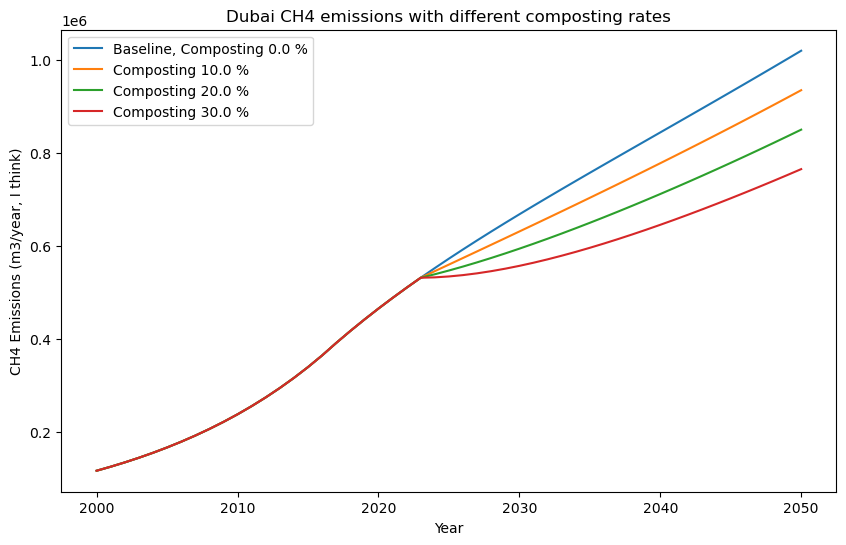

In [7]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Get baseline data
col = city.total_emissions.loc['2000':'2050', 'total'].copy()

# Plot the baseline
col.plot(label=f'Baseline, Composting {city.compost_fraction * 100} %')

# Swap in the new compost values and rerun
for c in compost_range:
    # if c == 0.3:
    #     continue
    city.change_compost(c)
    new_col = city.total_emissions.loc['2000':'2050', 'total'].copy()
    new_col.plot(label=f'Composting {c * 100} %')

plt.xlabel('Year')
plt.ylabel('CH4 Emissions (m3/year, I think)')
plt.title('Dubai CH4 emissions with different composting rates')
plt.legend(loc='best')

plt.show()

In [14]:
print(city.compost_fraction)
city.compost_fraction = 0.5
city.div_fractions['compost']

0.5


0.0